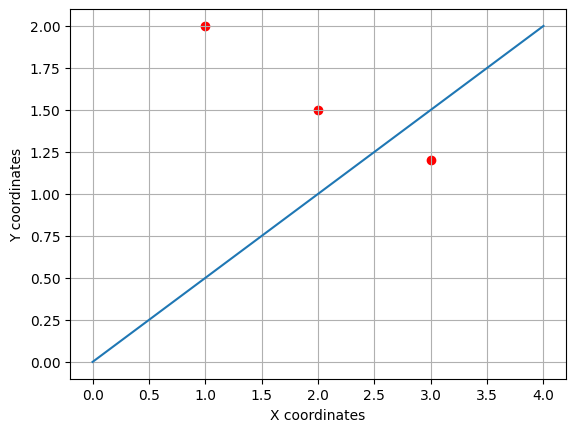

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Three points
X = np.array([
    [1, 2],
    [2, 1.5],
    [3, 1.2]
]).T

# Show plot
plt.scatter(X[0, :], X[1, :], c="r") # this is the plot for the points

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 4)
f_x = x * 0.5

# Plot line
# Add grid lines
plt.grid(True)
plt.plot(x, f_x)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.show()

P:
 [[0.8 0.4]
 [0.4 0.2]]
projected points:
 [[1.6  2.2  2.88]
 [0.8  1.1  1.44]]


Text(0, 0.5, 'Y coordinates')

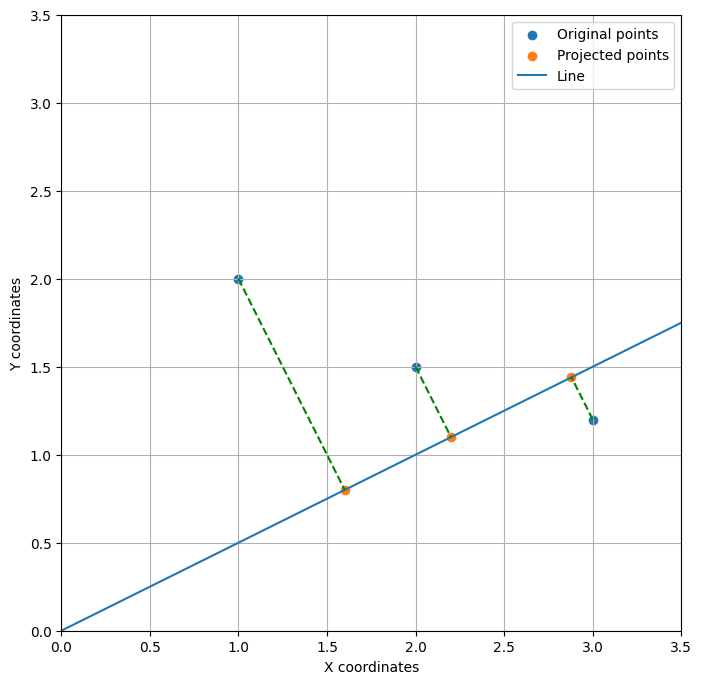

In [2]:
##1
#The line l written as the design matrix
A = np.array([[1, 0.5]]).T  #  has to be a column vector

##2
## construct projection matrix
P = (A @ np.linalg.inv(A.T @ A)) @ A.T
print("P:\n", P)

#projection the points with matrix multiplication
x_prime = P @ X
print("projected points:\n", x_prime)
# Creating a square figure (makes it easier to visually confirm projection)
plt.figure(figsize=(8, 8))

plt.scatter(X[0, :], X[1, :], label="Original points")  # Old points
plt.scatter(x_prime[0, :], x_prime[1, :], label="Projected points")  # Projected points
plt.plot(x, f_x, label="Line")  # Line
plt.legend()

# Gather old and projected points in a single array
P1 = np.concatenate([X.T[:, :].reshape(1, 3, 2), x_prime.T[:, :].reshape(1, 3, 2)], axis=0)
# Plot projection/error lines
plt.plot(P1[:, 0, 0], P1[:, 0, 1], 'g--')
plt.plot(P1[:, 1, 0], P1[:, 1, 1], 'g--')
plt.plot(P1[:, 2, 0], P1[:, 2, 1], 'g--')
# Add grid lines
plt.grid(True)
# Set axes limits to be the same for equal aspect ratio
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")

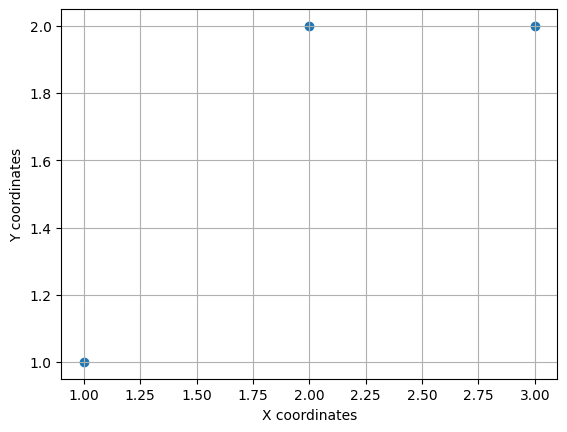

In [3]:
## 3
# Define the example points
X = np.array([
    [1, 1],
    [2, 2],
    [3, 2]
]).T

plt.grid(True)
plt.scatter(X[0, :], X[1, :])
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
# Display the plot
plt.show()

In [4]:
x_vals = X[0, :]
y_vals = X[1, :]

A = np.vstack((x_vals, np.ones(x_vals.shape))).T
print("A\n", A)
P = np.linalg.inv(A.T @ A) @ A.T
# Applying the transformation
w = P @ y_vals
print("w:", w)
# Calculating the projected y-values
y_hat = A @ w

A
 [[1. 1.]
 [2. 1.]
 [3. 1.]]
w: [0.5        0.66666667]


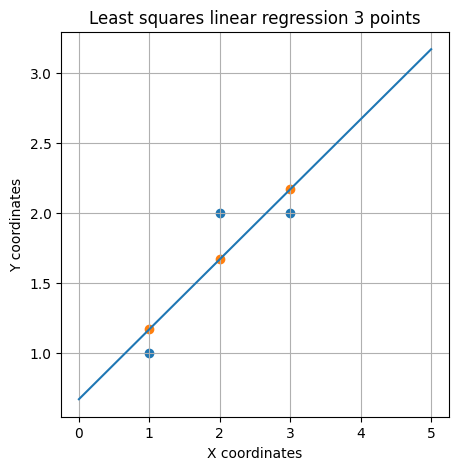

In [5]:
x = np.linspace(0, 5)  # Create range of values
y = x * w[0] + w[1]  # Calculate f(x)

plt.figure(figsize=(5, 5))

plt.plot(x, y)  # Plot line
plt.scatter(X[0, :], X[1, :])  # Plot original points

plt.scatter(X[0, :], y_hat)  # Plot the points
plt.title('Least squares linear regression 3 points')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.grid(True)
plt.show()

In [6]:
# Calculating the error
diff = y_vals - y_hat
e = np.sqrt(diff @ diff.T)
print("e", e)

e 0.4082482904638632


In [7]:
diff = y_vals - y_hat
rms = np.sqrt((diff @ diff.T).mean())
print("root mean squared error", rms)

root mean squared error 0.4082482904638632
